<a href="https://colab.research.google.com/github/AlineSouzaSantos/Pyhton_Dados/blob/master/Modelos_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd

Faça uma análise inicial sobre esse dataset

In [11]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first 5 rows
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display descriptive statistics
print(df.describe())

# Count the occurrences of each target class
print(df['target'].value_counts())

# Display the column names and their data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

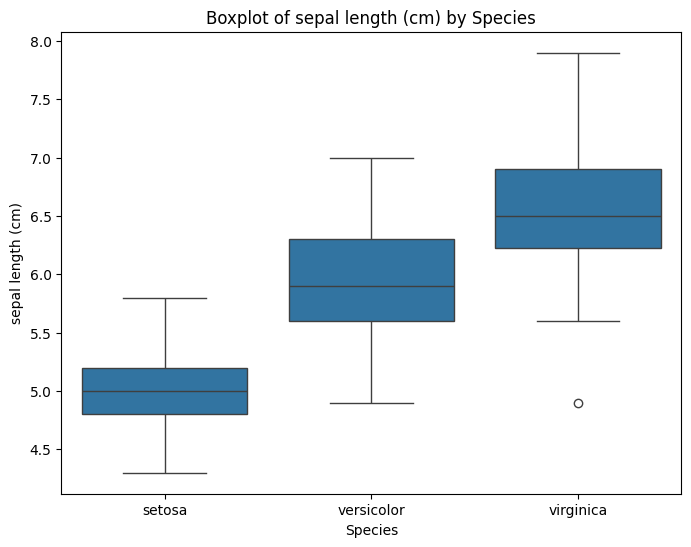

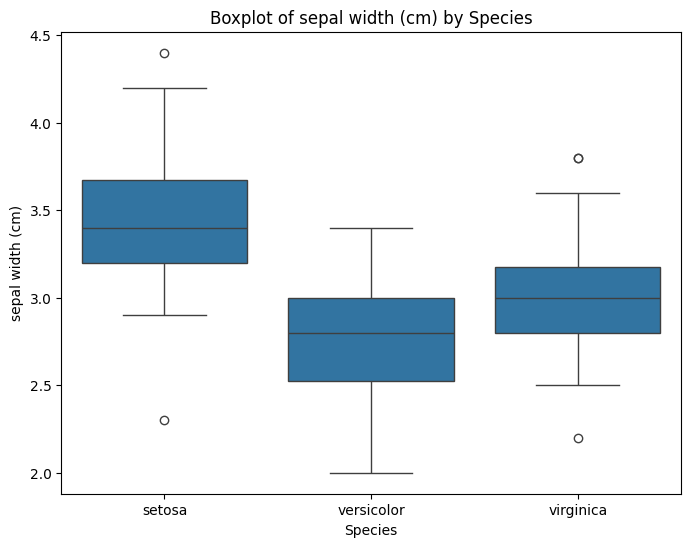

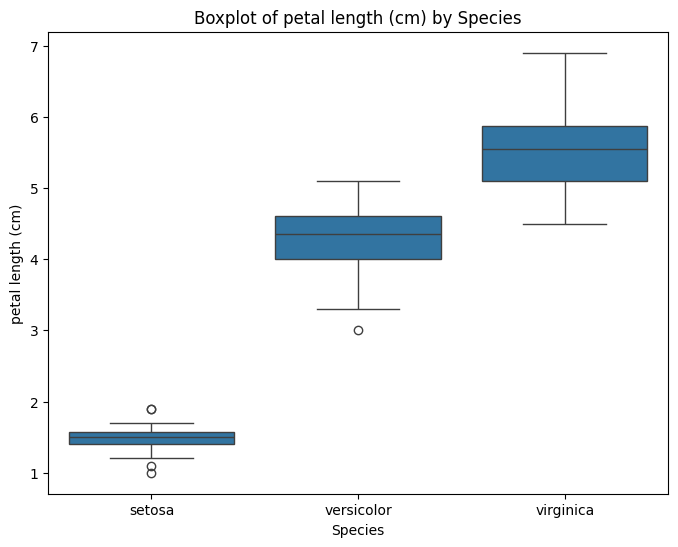

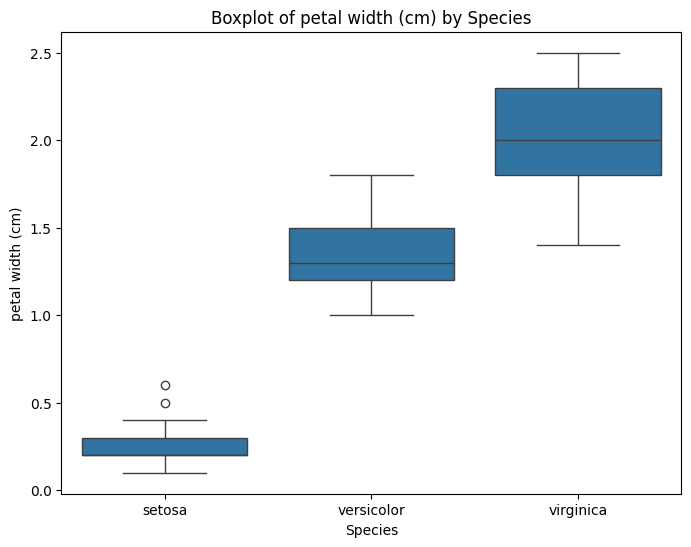

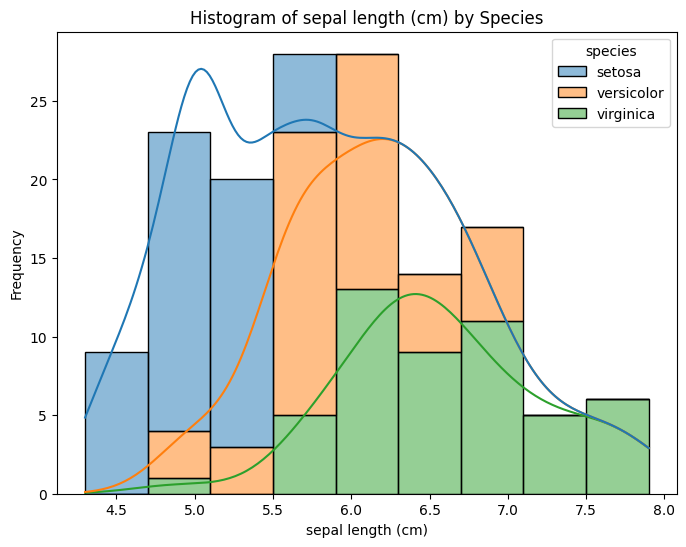

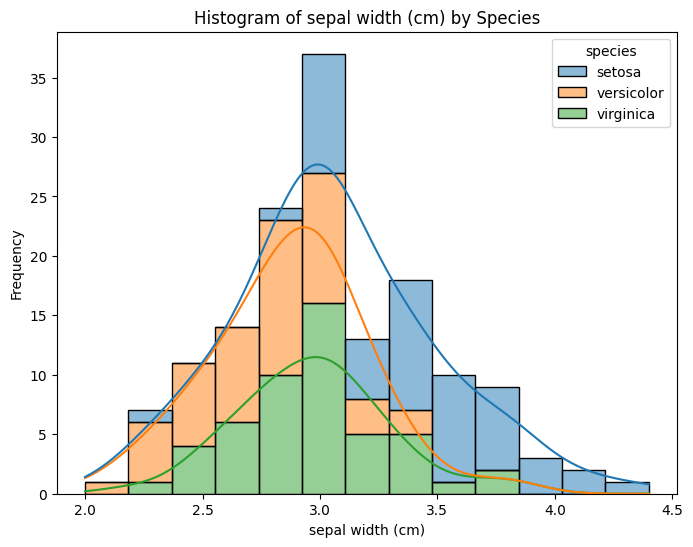

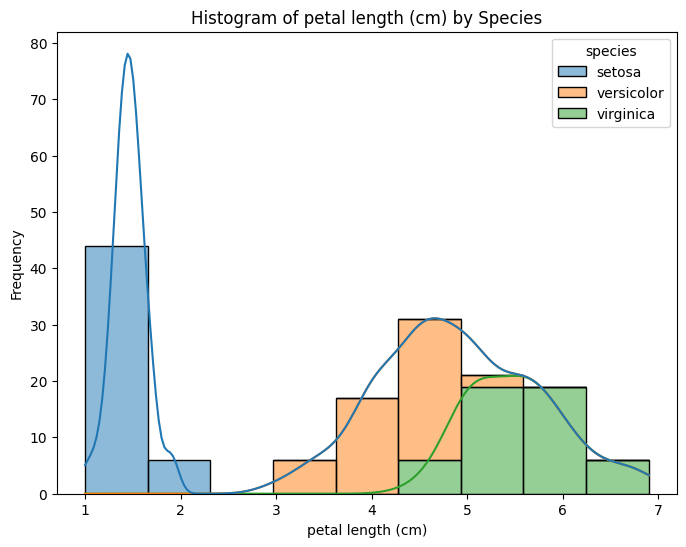

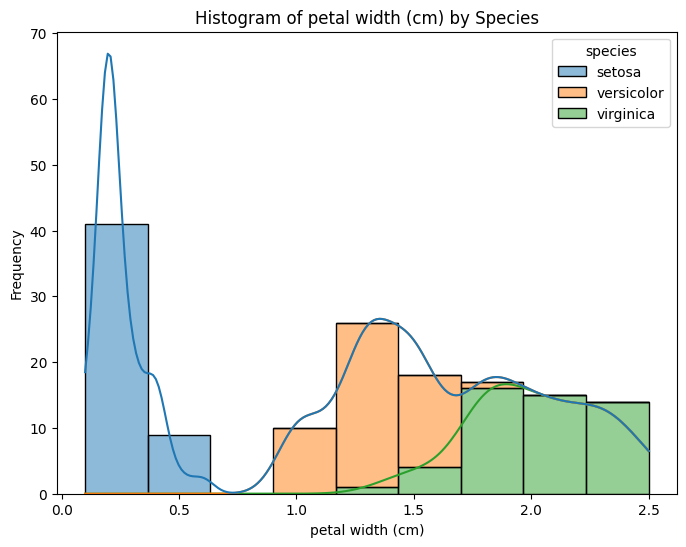

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapear valores numéricos alvo para nomes de espécies
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['target'].map(target_names)

# Boxplots para cada característica, separados por espécie
for feature in iris.feature_names:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='species', y=feature, data=df)
  plt.title(f'Boxplot of {feature} by Species')
  plt.xlabel('Species')
  plt.ylabel(feature)
  plt.show()

# Histogramas para cada característica, separados por espécie
for feature in iris.feature_names:
  plt.figure(figsize=(8, 6))
  sns.histplot(data=df, x=feature, hue='species', multiple='stack', kde=True)
  plt.title(f'Histogram of {feature} by Species')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

Somente olhando esses gráficos, é possível afirmar que uma ou mais propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) são suficientes para distinguir as espécies?

# Analisando os boxplots e histogramas:

## Petal Length e Petal Width:
- Os boxplots e histogramas de Petal Length e Petal Width mostram uma separação clara entre as espécies.
- A espécie 'setosa' possui valores de Petal Length e Petal Width significativamente menores do que as outras duas espécies.
- As espécies 'versicolor' e 'virginica' têm alguma sobreposição, mas ainda há diferenças notáveis nas distribuições.

## Sepal Length:
- O Sepal Length mostra alguma distinção, com 'setosa' tendo valores menores e 'virginica' tendo valores maiores, mas há mais sobreposição entre as espécies do que nas características das pétalas.

## Sepal Width:
- O Sepal Width tem a maior sobreposição entre as espécies, tornando essa característica menos útil isoladamente para distinguir as espécies.

## Conclusão baseada nos gráficos:
Sim, somente olhando os gráficos, é possível afirmar que as propriedades Petal_Length e Petal_Width, sozinhas ou em combinação, parecem ser suficientes para distinguir as espécies de íris, especialmente para separar a 'setosa' das outras duas. O Sepal_Length também contribui para a distinção, embora com mais sobreposição. O Sepal_Width é a propriedade menos discriminatória visualmente.

Portanto, com base apenas na inspeção visual desses gráficos, Petal_Length e Petal_Width são as propriedades mais promissoras para a classificação das espécies.

## Aplique a regressão logística para avaliar o modelo declassificação.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar features (X) e target (y)
X = df[iris.feature_names]
y = df['target']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=200) # Aumentar max_iter se houver warning de convergência
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Interpretação dos resultados:
# - Confusion Matrix: Mostra o número de previsões corretas e incorretas para cada classe.
# - Classification Report: Fornece métricas como Precisão (Precision), Recall, F1-Score e Suporte (Support) para cada classe.
#   - Precisão: Proporção de previsões positivas corretas.
#   - Recall: Proporção de positivos reais que foram identificados corretamente.
#   - F1-Score: Média harmônica da Precisão e Recall.
#   - Suporte: O número de ocorrências reais da classe no conjunto de teste.
# - Accuracy Score: A proporção de previsões totais que foram corretas.

# Com base nessas métricas, podemos avaliar o desempenho do modelo de Regressão Logística na classificação das espécies de íris. Um accuracy score próximo de 1 indica um bom desempenho. O classification report detalha o desempenho para cada classe individualmente.

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score:
1.0


## Calcule a acurácia, precisão e recall.

In [14]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

# Precisão, Recall e F1-score por classe (do classification_report)
# O classification_report já exibe estes valores para cada classe e a média ponderada (weighted avg)

# Se você quiser extrair explicitamente a precisão, recall e F1-score médios (weighted avg):
report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)

# Média ponderada da Precisão
weighted_precision = report['weighted avg']['precision']
print(f"Precisão (Média Ponderada): {weighted_precision}")

# Média ponderada do Recall
weighted_recall = report['weighted avg']['recall']
print(f"Recall (Média Ponderada): {weighted_recall}")

# Média ponderada do F1-score
weighted_f1_score = report['weighted avg']['f1-score']
print(f"F1-Score (Média Ponderada): {weighted_f1_score}")

# Note que estes valores (accuracy, weighted precision e weighted recall) são os mesmos
# que foram impressos anteriormente pelo classification_report e accuracy_score.

Acurácia: 1.0
Precisão (Média Ponderada): 1.0
Recall (Média Ponderada): 1.0
F1-Score (Média Ponderada): 1.0


##Plote a matriz de confusão com matplotlib ou seaborn.

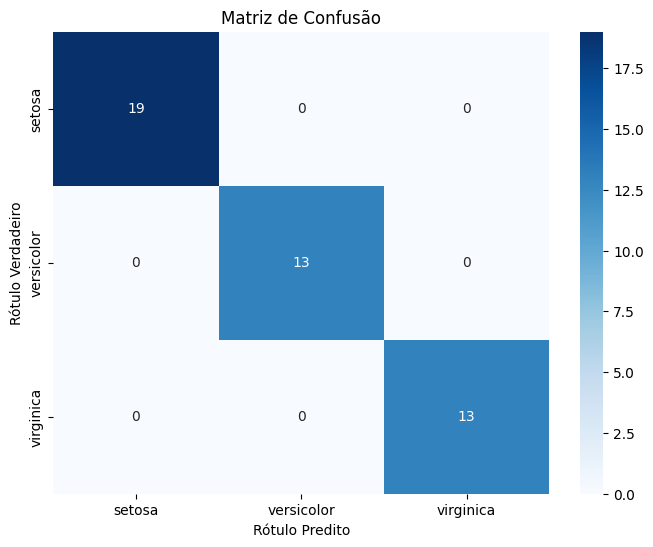

In [15]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.xlabel('Rótulo Predito')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

2 Utilizando o dataset load_digits.
###Responda:

a. Faça uma análise inicial sobre esse dataset:

b. Quantos dados possui?

c. Existem dados nulos? Se sim quantos?

d. Todos são dados numéricos ou existem colunas com dados categóricos?

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

Informações sobre o dataset load_digits:
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Descrição do dataset:
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 

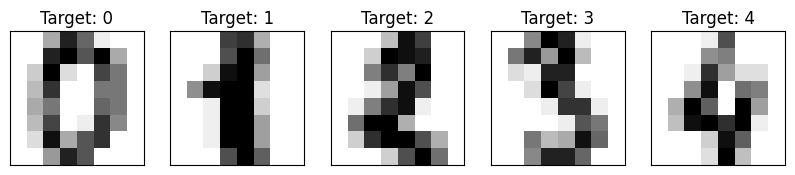

In [20]:
# a. Análise inicial sobre o dataset load_digits
print("Informações sobre o dataset load_digits:")
print(digits.keys()) # Mostra as chaves disponíveis no objeto digits

print("\nDescrição do dataset:")
print(digits.DESCR)

# b. Quantos dados possui?
# O número de dados é o número de imagens, que corresponde ao número de linhas no array 'data' ou 'images'.
n_samples = digits.data.shape[0]
print(f"\nO dataset load_digits possui {n_samples} dados (imagens).")

# c. Existem dados nulos? Se sim quantos?
# O dataset load_digits, assim como a maioria dos datasets embutidos no scikit-learn,
# é limpo e não possui valores nulos. Podemos verificar isso inspecionando o array 'data'.
import numpy as np
missing_values_count = np.isnan(digits.data).sum()
print(f"\nNúmero de dados nulos no dataset: {missing_values_count}")
if missing_values_count == 0:
  print("Não existem dados nulos no dataset.")
else:
  print(f"Existem {missing_values_count} dados nulos no dataset.")


# d. Todos são dados numéricos ou existem colunas com dados categóricos?
print("\nVerificando o tipo de dados:")
print(f"Tipo de dados das features (pixels): {digits.data.dtype}")
print(f"Tipo de dados do target (rótulos): {digits.target.dtype}")
print("Todos os dados no dataset são numéricos.")

# Visualizando algumas imagens e seus rótulos para entender o dataset
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3), subplot_kw={'xticks':[], 'yticks':[]})
for ax, image, label in zip(axes.flat, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Target: {label}')
plt.show()

### Aplique a regressão logística para construir e avaliar o modelo de classificação.
###Calcule a acurácia, precisão e recall com base no desempenho do modelo.
###Plote a matriz de confusão dos resultados do modelo utilizando matplotlib ou seaborn.
###Aplique a regressão logística para avaliar o modelo de classificação dos  dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema (por exemplo, MNIST)


Avaliação do modelo de Regressão Logística no dataset digits:
Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.95      0.95        66
           6       0.96      0.98      0.97        53
           7       1.00      0.96      0.98        55
           8       0.91      0.98      0.94        43
           9       0.97

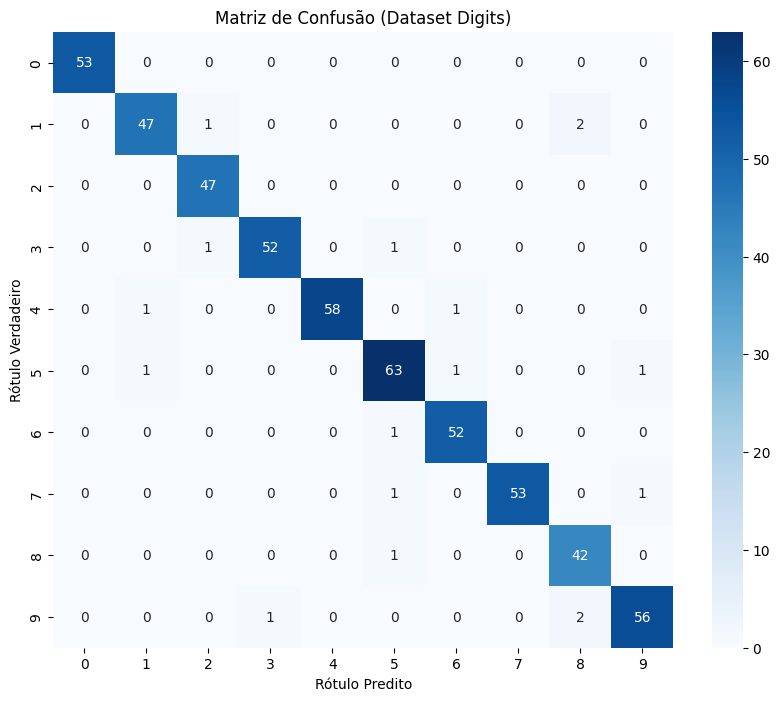

In [21]:
# Separar features (X) e target (y) para o dataset digits
X_digits = digits.data
y_digits = digits.target

# Dividir os dados em conjuntos de treinamento e teste
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

# Inicializar e treinar o modelo de Regressão Logística para digits
model_digits = LogisticRegression(max_iter=10000) # Aumentar max_iter para dataset maior
model_digits.fit(X_train_digits, y_train_digits)

# Fazer previsões no conjunto de teste
y_pred_digits = model_digits.predict(X_test_digits)

# Avaliar o modelo
print("\nAvaliação do modelo de Regressão Logística no dataset digits:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_digits, y_pred_digits))

print("\nClassification Report:")
print(classification_report(y_test_digits, y_pred_digits, target_names=[str(i) for i in range(10)])) # Rótulos de 0 a 9

print("\nAccuracy Score:")
print(accuracy_score(y_test_digits, y_pred_digits))

# Interpretação dos resultados para digits:
# Assim como para o dataset iris, as métricas de Confusion Matrix, Classification Report e Accuracy Score
# nos permitem avaliar o desempenho do modelo de Regressão Logística na classificação dos dígitos manuscritos.
# Uma acurácia alta indica que o modelo está prevendo corretamente a maioria dos dígitos.
# O classification report detalha o desempenho para cada dígito individual (0 a 9).

# ### Calcule a acurácia, precisão e recall para o dataset digits.
# Acurácia
accuracy_digits = accuracy_score(y_test_digits, y_pred_digits)
print(f"\nAcurácia (dataset digits): {accuracy_digits}")

# Precisão, Recall e F1-score por classe (do classification_report)
# O classification_report já exibe estes valores para cada classe e a média ponderada (weighted avg)

# Extrair explicitamente a precisão, recall e F1-score médios (weighted avg) para digits:
report_digits = classification_report(y_test_digits, y_pred_digits, target_names=[str(i) for i in range(10)], output_dict=True)

# Média ponderada da Precisão
weighted_precision_digits = report_digits['weighted avg']['precision']
print(f"Precisão (Média Ponderada, dataset digits): {weighted_precision_digits}")

# Média ponderada do Recall
weighted_recall_digits = report_digits['weighted avg']['recall']
print(f"Recall (Média Ponderada, dataset digits): {weighted_recall_digits}")

# Média ponderada do F1-score
weighted_f1_score_digits = report_digits['weighted avg']['f1-score']
print(f"F1-Score (Média Ponderada, dataset digits): {weighted_f1_score_digits}")

# ### Plote a matriz de confusão com matplotlib ou seaborn para o dataset digits.
# Gerar a matriz de confusão para digits
cm_digits = confusion_matrix(y_test_digits, y_pred_digits)

# Plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_digits, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Matriz de Confusão (Dataset Digits)')
plt.xlabel('Rótulo Predito')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

###Calcule a acurácia, precisão e recall com base no desempenho do modelo para a classificação dos dígitos de 0 a 9.

In [23]:
#Ja feito no anterior
print("\nMétricas calculadas para a classificação dos dígitos (dataset load_digits):")
print(f"Acurácia: {accuracy_digits}")
print(f"Precisão (Média Ponderada): {weighted_precision_digits}")
print(f"Recall (Média Ponderada): {weighted_recall_digits}")


Métricas calculadas para a classificação dos dígitos (dataset load_digits):
Acurácia: 0.9685185185185186
Precisão (Média Ponderada): 0.9691575439595803
Recall (Média Ponderada): 0.9685185185185186


###Plote a matriz de confusão dos resultados da classificação dos dígitos de 0 a 9 utilizando matplotlib ou seaborn

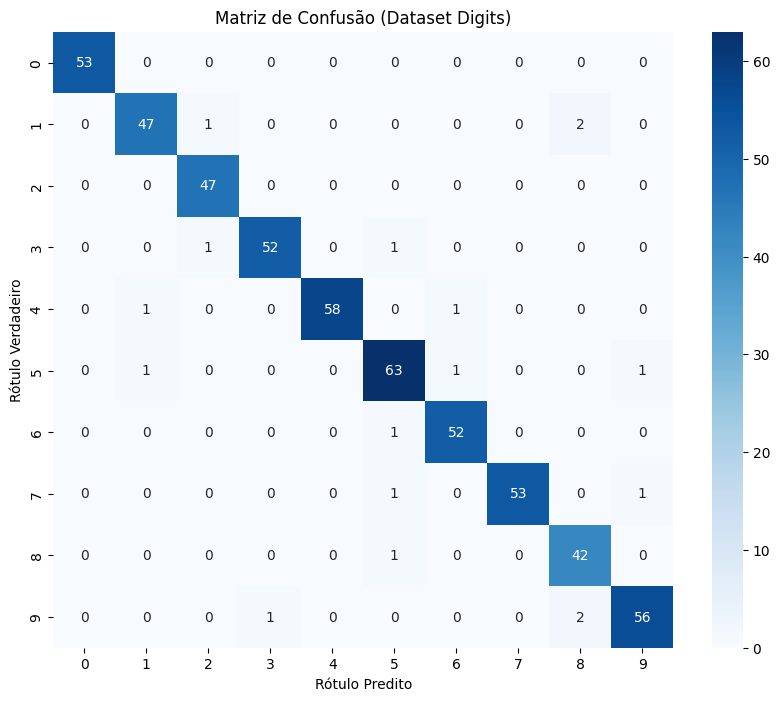

In [24]:
# Gerar a matriz de confusão para digits
cm_digits = confusion_matrix(y_test_digits, y_pred_digits)

# Plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_digits, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Matriz de Confusão (Dataset Digits)')
plt.xlabel('Rótulo Predito')
plt.ylabel('Rótulo Verdadeiro')
plt.show()